In [2]:
import streamlit as st
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [ ]:
print("Welcome to Chili Wrangling")

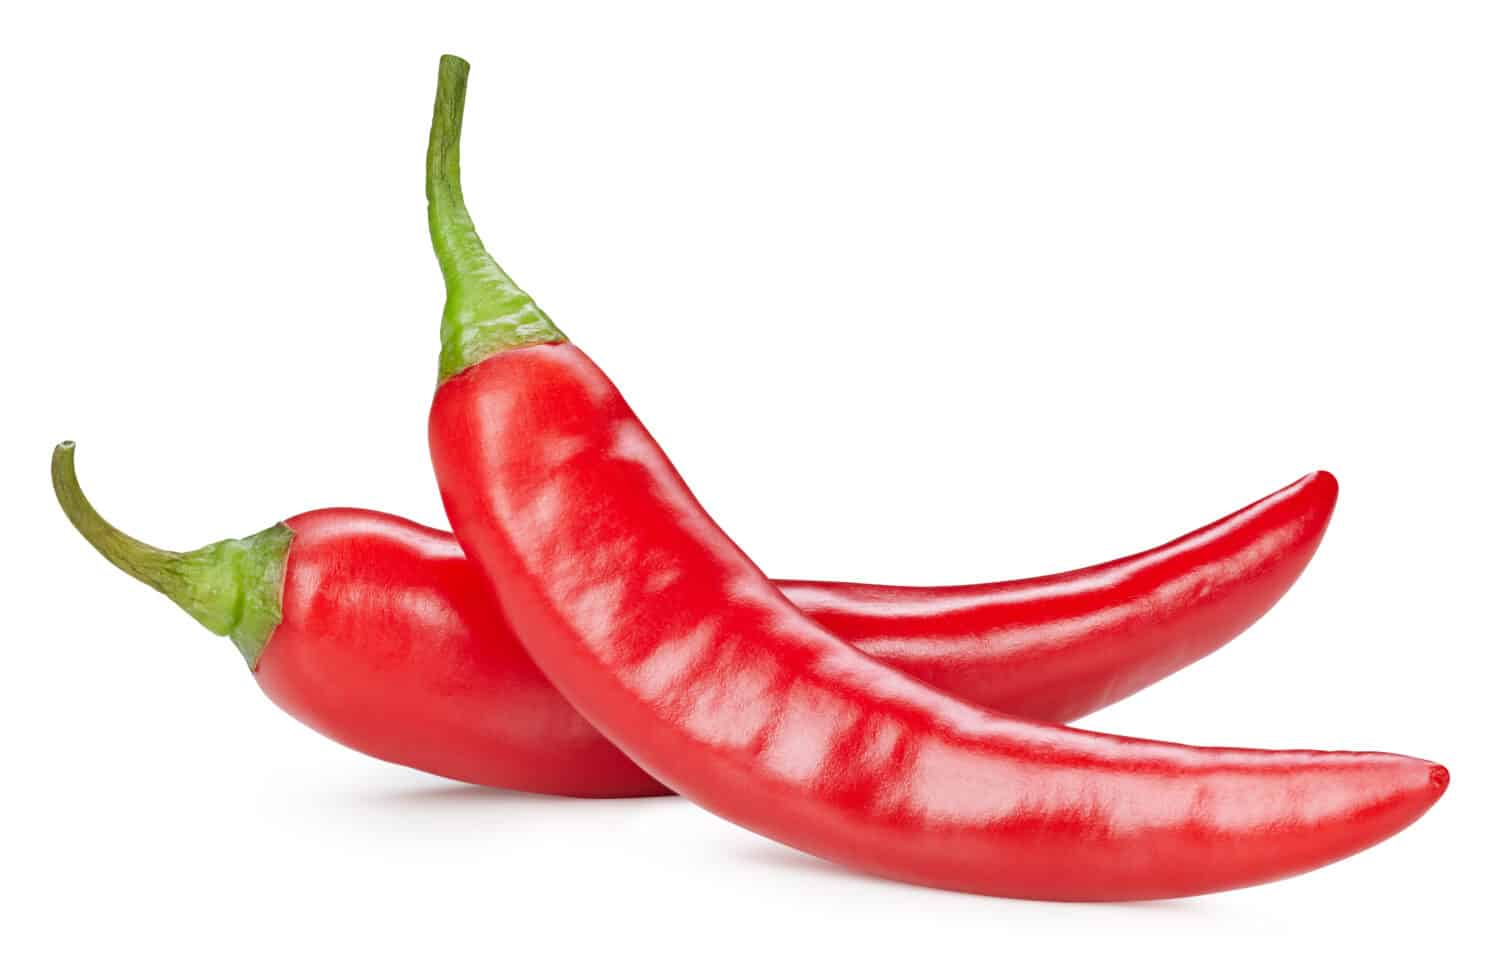

In [1]:
from IPython.display import Image
Image("data/chili.jpg")

In [3]:
df = pd.read_csv('data/dc_bikes.csv', parse_dates=['datetime'])
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,43


In [4]:
# aggregating by date max, min temperature and the total count of rented bikes
df_aggr = df.groupby(by=df['datetime'].dt.date).agg({'temp' : ['min', 'max'], 'count' : 'sum'}).reset_index()
# renaming double level columns
df_aggr.columns = ['date', 'temp_min', 'temp_max', 'rented_sum']
# adding year, month and week columns
df_aggr['date'] = pd.to_datetime(df_aggr['date'])
df_aggr['year'] = df_aggr['date'].dt.year
df_aggr['month'] = df_aggr['date'].dt.month
df_aggr['week'] = pd.to_datetime(df_aggr['date']).dt.isocalendar().week
df_aggr['week'] = df_aggr['week'].astype(int)
df_aggr

,date,temp_min,temp_max,rented_sum,year,month,week
0,2011-01-01,8.20,18.86,985,2011,1,52
1,2011-01-02,9.02,18.86,801,2011,1,52
2,2011-01-03,5.74,10.66,1349,2011,1,1
3,2011-01-04,4.92,12.30,1562,2011,1,1
4,2011-01-05,6.56,12.30,1600,2011,1,1
...,...,...,...,...,...,...,...
726,2012-12-27,9.84,12.30,1044,2012,12,52
727,2012-12-28,9.02,12.30,1237,2012,12,52
728,2012-12-29,8.20,12.30,820,2012,12,52
729,2012-12-30,8.20,13.94,948,2012,12,52


In [ ]:
df_aggr.info()

In [6]:
# static filter
year = 2011
month = 6

# applying filter
df_aggr_filtered = df_aggr[(df_aggr['year'] == year) & (df_aggr['month'] == month)]
df_aggr_filtered.head()

,date,temp_min,temp_max,rented_sum,year,month,week
151,2011-06-01,27.06,36.90,3974,2011,6,22
152,2011-06-02,25.42,32.80,4968,2011,6,22
153,2011-06-03,21.32,29.52,5312,2011,6,22
154,2011-06-04,20.50,30.34,5342,2011,6,22
155,2011-06-05,24.60,30.34,4906,2011,6,22


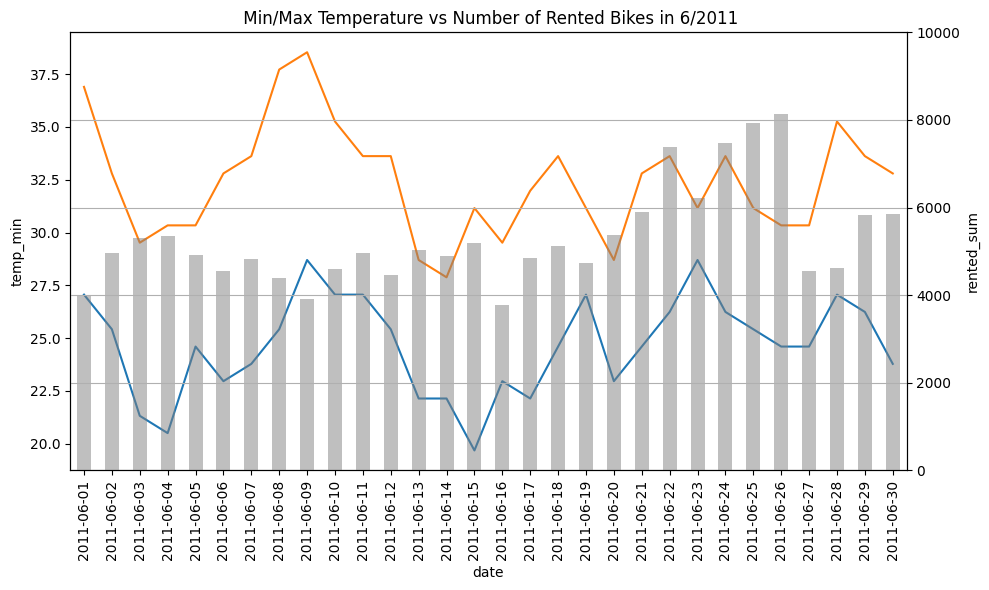

In [7]:
# plotting filtered month and year
fig, axs = plt.subplots(figsize=(10,6))

ax1 = sns.lineplot(data=df_aggr_filtered, x=df_aggr_filtered['date'].astype(str), y='temp_min')
ax2 = sns.lineplot(data=df_aggr_filtered, x=df_aggr_filtered['date'].astype(str), y='temp_max')

plt.xticks(rotation=90)

ax3 = plt.twinx()
sns.barplot(data=df_aggr_filtered, x=df_aggr_filtered['date'].astype(str), y='rented_sum', 
            ax=ax3, color='grey', width=.5, alpha=.5)

ax3.set(ylim=(0, 10_000))
plt.title(f" Min/Max Temperature vs Number of Rented Bikes in {month}/{year}")

plt.grid()
plt.tight_layout();

In [11]:
range(1,13)[-1]

12

In [ ]:
# aggregated by week

# df_aggr_week = df.groupby(by=df['datetime'].dt.isocalendar().week).agg({'temp' : ['min', 'max'], 'count' : 'sum'}).reset_index()
# df_aggr_week.columns = ['week', 'temp_min', 'temp_max', 'rented_sum']
# df_aggr_week['week'] = df_aggr_week['week'].astype(int)
# df_aggr_week

In [ ]:
# plt.subplots(figsize=(10,6))

# sns.lineplot(data=df_aggr_week, x='week', y='temp_min')
# sns.lineplot(data=df_aggr_week, x='week', y='temp_max')
# ax2 = plt.twinx()
# sns.barplot(data=df_aggr_week, x='week', y='rented_sum', ax=ax2, color='grey', width=.5, alpha=.5)

# ax2.set(ylim=(0, 150_000))
# plt.title(f" Min/Max Temperature vs Number of Rented Bikes")
# plt.grid();